# Análisis de partidas online de ajedrez


## Contexto

Este libro de Jupyter Notebook se centra en el análisis de un conjunto de datos de partidas de ajedrez, extraído de la plataforma Kaggle. El ajedrez, como uno de los juegos de estrategia más antiguos y populares del mundo, ha sido objeto de estudio para entender patrones, estrategias y rendimiento de los jugadores.

Link de acceso a los datos: https://www.kaggle.com/datasets/ulrikthygepedersen/online-chess-games/data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv(r'chess_games\chess_games.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

### Explicación de cada una de las columnas del dataset

game_id: Un identificador único para cada partida de ajedrez en el dataset.

rated: Una variable booleana que indica si la partida fue clasificada o no. Es decir, si la partida contribuyó o no al rating de los jugadores.

turns: El número total de movimientos realizados en la partida.

victory_status: El estado de la partida al finalizar, puede ser "mate" (jaque mate), "resign" (rendición), "outoftime" (tiempo agotado), o "draw" (empate).

winner: El jugador que ganó la partida, puede ser "white" (blancas), "black" (negras), o "draw" (empate).

time_increment: El incremento de tiempo (en segundos) que se añade al reloj de cada jugador después de cada movimiento.

white_id: El identificador del jugador que jugó con las piezas blancas.

white_rating: El rating Elo del jugador que jugó con las piezas blancas al momento de la partida.

black_id: El identificador del jugador que jugó con las piezas negras.

black_rating: El rating Elo del jugador que jugó con las piezas negras al momento de la partida.

moves: Una cadena de texto que contiene todos los movimientos realizados en la partida en notación algebraica estándar.

opening_code: Un código que representa la apertura utilizada en la partida.

opening_moves: El número de movimientos realizados en la apertura.

opening_fullname: El nombre completo de la apertura utilizada.

opening_shortname: El nombre corto de la apertura utilizada.

opening_response: La respuesta a la apertura, si está disponible.

opening_variation: La variación específica de la apertura utilizada.

#### Qué es el rating?

El rating en el contexto del ajedrez es una medida numérica que se utiliza para estimar la habilidad relativa de un jugador en comparación con otros jugadores. Esta medida se basa en el sistema de clasificación Elo, desarrollado por el físico y estadístico Arpad Elo en la década de 1960.

En términos simples, el rating representa el nivel de habilidad de un jugador en el juego de ajedrez. Cuanto más alto sea el rating de un jugador, se supone que es más fuerte y más habilidoso en el juego. Por ejemplo, un jugador con un rating de 2000 se considera generalmente más fuerte que un jugador con un rating de 1500.

El rating se actualiza después de cada partida clasificada, dependiendo del resultado (victoria, derrota o empate) y del rating relativo de los jugadores involucrados. Si un jugador vence a otro con un rating más alto, su rating generalmente aumentará más que si venciera a un jugador con un rating más bajo, y viceversa si pierde. Los empates también pueden afectar los ratings, aunque en menor medida que las victorias o derrotas.

In [4]:
df.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


In [5]:
df.describe()

,game_id,turns,white_rating,black_rating,opening_moves
count,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,10029.500000,60.465999,1596.631868,1588.831987,4.816981
std,5790.390185,33.570585,291.253376,291.036126,2.797152
min,1.000000,1.000000,784.000000,789.000000,1.000000
25%,5015.250000,37.000000,1398.000000,1391.000000,3.000000
50%,10029.500000,55.000000,1567.000000,1562.000000,4.000000
75%,15043.750000,79.000000,1793.000000,1784.000000,6.000000
max,20058.000000,349.000000,2700.000000,2723.000000,28.000000


In [6]:
df.describe(exclude=np.number)

,rated,victory_status,winner,time_increment,white_id,black_id,moves,opening_code,opening_fullname,opening_shortname,opening_response,opening_variation
count,20058,20058,20058,20058,20058,20058,20058,20058,20058,20058,1207,14398
unique,2,4,3,400,9438,9331,18920,365,1477,128,3,615
top,True,Resign,White,10+0,taranga,taranga,e4 e5,A00,Van't Kruijs Opening,Sicilian Defense,Declined,#2
freq,16155,11147,10001,7721,72,82,27,1007,368,2632,503,797


## Análisis "Distribución de victorias"

C:\Users\bryan\AppData\Local\Temp\ipykernel_18552\1985856630.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=victory_counts.index, y=victory_counts.values, palette='viridis')


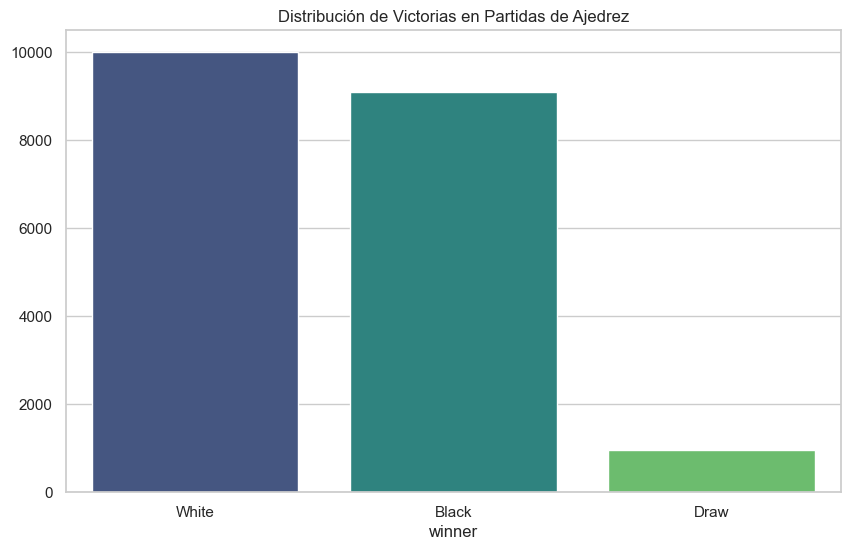

In [7]:

victory_counts = df['winner'].value_counts()
# Configuración de estilos de los gráficos
sns.set(style="whitegrid")
# Creación del gráfico de barras para la distribución de victorias
plt.figure(figsize=(10, 6))
sns.barplot(x=victory_counts.index, y=victory_counts.values, palette='viridis')
plt.title('Distribución de Victorias en Partidas de Ajedrez')
plt.show()

En este gráfico, se destaca principalmente la ventaja que tienen las blancas debido a su capacidad para realizar el primer movimiento en una partida de ajedrez. Esta ventaja inicial les otorga una mayor probabilidad de éxito en comparación con las negras. El primer movimiento permite a las blancas tomar la iniciativa en el desarrollo de la partida, establecer el tono y dictar el ritmo del juego. Además, les brinda la oportunidad de ocupar posiciones estratégicas en el tablero antes de que las negras tengan la oportunidad de responder. Esta ventaja posicional puede ser crucial en la determinación del resultado final de la partida, ya que las blancas pueden aprovecharla para presionar y mantener la iniciativa durante todo el juego.

## Análisis "Popularidad de las aperturas"

C:\Users\bryan\AppData\Local\Temp\ipykernel_18552\2283873499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=opening_counts.values, y=opening_counts.index, palette='viridis')


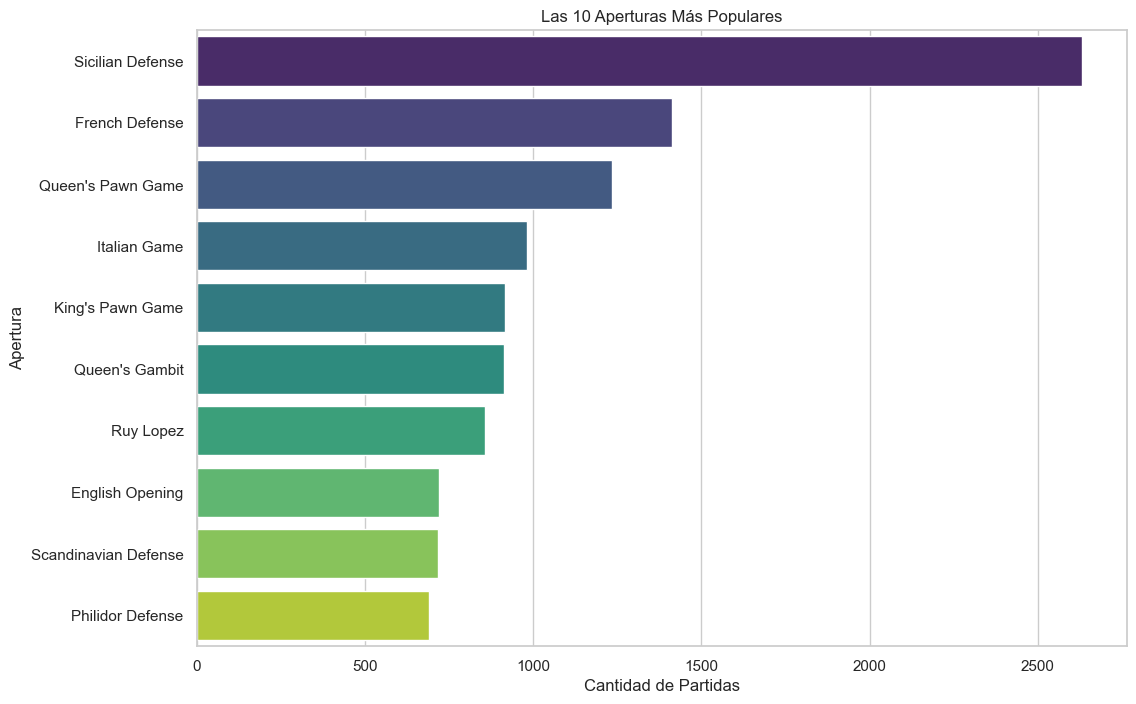

In [8]:

opening_counts = df['opening_shortname'].value_counts().head(10)

# Creación del gráfico para las aperturas más populares
plt.figure(figsize=(12, 8))
sns.barplot(x=opening_counts.values, y=opening_counts.index, palette='viridis')
plt.title('Las 10 Aperturas Más Populares')
plt.xlabel('Cantidad de Partidas')
plt.ylabel('Apertura')
plt.show()

Al observar este gráfico, se destaca que entre las 10 aperturas más populares, la Defensa Siciliana ocupa el primer lugar, seguida de la Defensa Francesa y luego las aperturas de Peón-Dama. Esta tendencia refleja la notable popularidad de la Defensa Siciliana, reconocida por sus intrincadas y desafiantes posiciones tácticas a las que muchos jugadores se enfrentan. Su posición predominante en el ranking sugiere que los jugadores la eligen con frecuencia debido a su riqueza estratégica y su capacidad para generar juegos dinámicos y competitivos. Es considerada por muchos la apertura más divertida.

## Análisis de distribución de ratings por partidas

A continuación, procederé a realizar un gráfico que representa la distribución de los ratings. Dado que en cada partida contamos con dos ratings, uno para las blancas y otro para las negras, es necesario obtener un solo valor para cada partida. En lugar de generar distribuciones separadas para los ratings de las blancas y las negras, calcularé el valor medio por partida. De esta manera, cada partida estará representada por un único valor de rating, siendo este el promedio entre el rating de las blancas y el rating de las negras. Utilizaré estos valores para crear una distribución de densidad de ratings.

In [9]:
df['average_rating'] = (df['white_rating'] + df['black_rating']) / 2

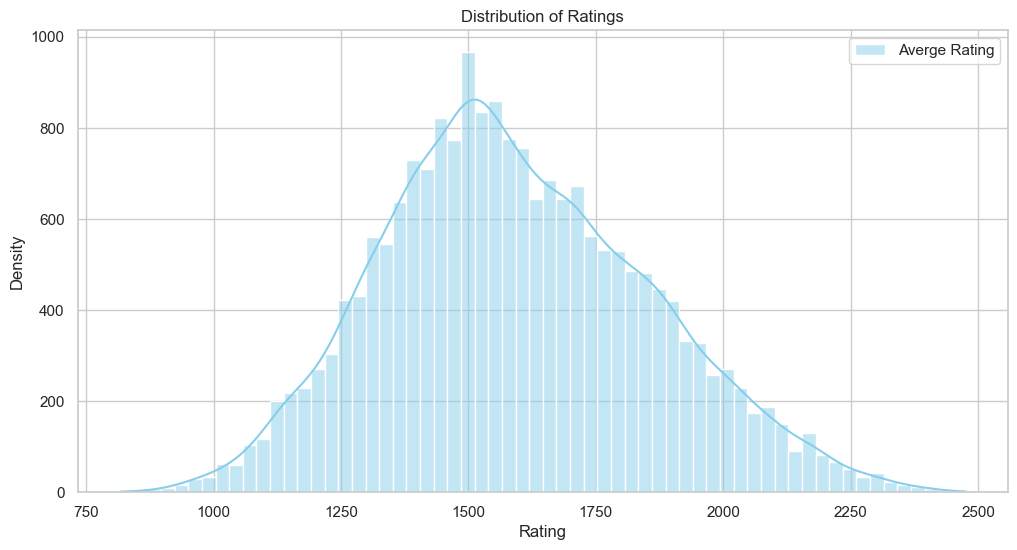

In [10]:
# Plotting ratings distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='average_rating', color='skyblue', label='Averge Rating', kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

En este gráfico, se evidencia una concentración notable alrededor del rating de 1500. Este punto representa no solo donde ocurren la mayoría de las partidas, sino también donde se encuentran la mayor cantidad de jugadores. Sin embargo, llama la atención la escasez relativa de jugadores con ratings muy altos en comparación con la gran cantidad de jugadores que se sitúan alrededor de este punto central. Esta disparidad sugiere que, mientras hay una base sólida de jugadores de nivel medio, hay una proporción mucho menor de jugadores de élite con ratings significativamente superiores, lo que hace que estos últimos sean más escasos en el panorama general del juego.

C:\Users\bryan\AppData\Local\Temp\ipykernel_18552\2190349821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='victory_status', palette='Set2')


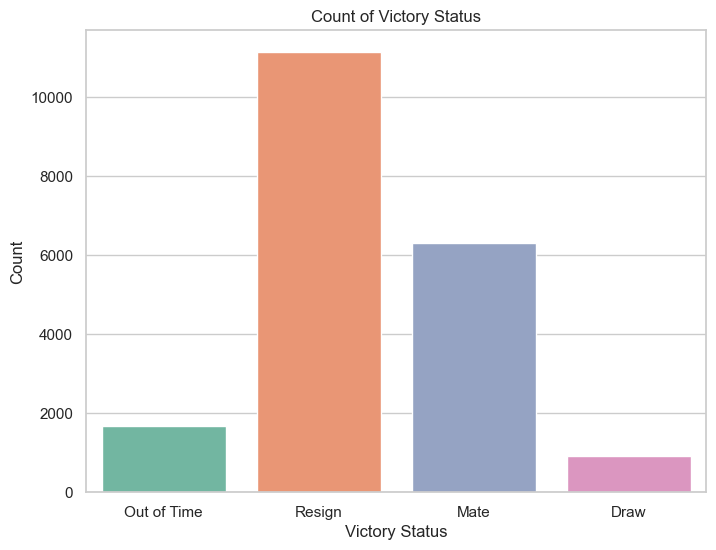

In [11]:
# Plotting victory status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='victory_status', palette='Set2')
plt.title('Count of Victory Status')
plt.xlabel('Victory Status')
plt.ylabel('Count')
plt.show()


En la condición de victoria, es común observar que el oponente abandone la partida antes de que puedas llevar a cabo el jaque mate. Esta situación se vuelve más frecuente en niveles de juego más avanzados.

# Calcular la cantidad de partidas para cada combinación de rating y condición de victoria

In [15]:
# Discretización de la variable para hacer el gráfico futuro más legible
intervalos_rating = [750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]
labels_rating = ['751-1000', '1001-1250', '1251-1500', '1501-1750', '1751-2000', '2001-2250', '2251-2500']

df['rating_interval'] = pd.cut(df['average_rating'], bins=intervalos_rating, labels=labels_rating, right=False)
df
data_grouped = df.groupby(['victory_status', 'rating_interval']).size().reset_index(name='count')
data_grouped

C:\Users\bryan\AppData\Local\Temp\ipykernel_18552\1546595450.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,victory_status,rating_interval,count
0,Draw,751-1000,2
1,Draw,1001-1250,72
2,Draw,1251-1500,219
3,Draw,1501-1750,296
4,Draw,1751-2000,199
5,Draw,2001-2250,96
6,Draw,2251-2500,22
7,Mate,751-1000,38
8,Mate,1001-1250,660
9,Mate,1251-1500,2383


### Descripción para niveles de rating ELO

751-1000: Jugadores principiantes o novatos, que están comenzando a aprender las reglas básicas del ajedrez y desarrollar estrategias iniciales.

1001-1250: Jugadores aficionados que tienen cierta experiencia en el juego y pueden realizar movimientos básicos con cierta habilidad, pero aún están trabajando en mejorar su comprensión táctica y estratégica.

1251-1500: Jugadores intermedios que tienen un buen conocimiento de las tácticas y estrategias fundamentales del ajedrez. Pueden realizar jugadas más avanzadas y están trabajando para mejorar su consistencia y precisión en el juego.

1501-1750: Jugadores avanzados que han desarrollado una comprensión sólida del juego. Pueden ejecutar planes tácticos y estratégicos con eficacia y están buscando perfeccionar su juego en todos los aspectos.

1751-2000: Jugadores expertos que tienen un alto nivel de habilidad y experiencia en el juego. Son capaces de jugar a un nivel competitivo y están familiarizados con una amplia variedad de aperturas, estrategias y tácticas.

2001-2250: Jugadores de nivel maestro que poseen un profundo conocimiento del juego y pueden competir a un nivel muy alto. Están altamente capacitados en todas las áreas del ajedrez y pueden jugar a un nivel casi profesional.

2251-2500: Grandes maestros y jugadores de élite que representan la élite del mundo del ajedrez. Tienen un dominio excepcional del juego y son capaces de competir con los mejores jugadores a nivel mundial en torneos de alto nivel.

In [13]:
registros_por_intervalo = df['rating_interval'].value_counts()
registros_por_intervalo


rating_interval
1501-1750    6896
1251-1500    5992
1751-2000    3937
1001-1250    1641
2001-2250    1339
2251-2500     160
751-1000       93
Name: count, dtype: int64

In [14]:
import plotly.express as px


# Crear el gráfico interactivo
fig = px.line(data_grouped, x="rating_interval", y="count", color="victory_status", title="Cantidad de partidas por rating y condición de victoria",
              labels={"rating_interval": "Rating", "count": "Cantidad de Partidas", "victory_status": "Victory Status"})

# Mostrar el gráfico
fig.show()

Con este gráfico se buscaba demostrar que la cantidad de empates aumentaban según aumentaba la fuerza del jugador, pero no quedó debido a la cantidad de partidos que existen en niveles medios, entonces afecta nuestro gráfico.

In [16]:

# Calcular porcentaje
merged_df = pd.merge(registros_por_intervalo, data_grouped, on="rating_interval", how="inner")
merged_df["Percent"] = (merged_df["count_y"] / merged_df["count_x"]) * 100
data_grouped_percent = merged_df.sort_values(by="rating_interval")
data_grouped_percent

,rating_interval,count_x,victory_status,count_y,Percent
27,751-1000,93,Resign,43,46.236559
25,751-1000,93,Mate,38,40.860215
24,751-1000,93,Draw,2,2.150538
26,751-1000,93,Out of Time,10,10.752688
15,1001-1250,1641,Resign,760,46.313224
14,1001-1250,1641,Out of Time,149,9.079829
12,1001-1250,1641,Draw,72,4.387569
13,1001-1250,1641,Mate,660,40.219378
7,1251-1500,5992,Resign,2973,49.616155
6,1251-1500,5992,Out of Time,417,6.959279


In [17]:



# Crear el gráfico interactivo
fig = px.line(data_grouped_percent, x="rating_interval", y="Percent", color="victory_status", title="Cantidad de partidas por rating y condición de victoria",
              labels={"rating_interval": "Rating", "count": "Cantidad de Partidas", "victory_status": "Victory Status"})

# Mostrar el gráfico
fig.show()

Ahora sí! Mientras aumenta el nivel la posibilidad dar mate a tu oponente disminuye casi a cero, pues los jugadores fuertes ven muchas jugadas adelante, por lo que abandonan cuando preveen la derrota.

In [18]:
# Agrupar los datos para el treemap
treemap_data = df.groupby(['rating_interval', 'opening_shortname', 'opening_variation']).size().reset_index(name='count')

C:\Users\bryan\AppData\Local\Temp\ipykernel_18552\1328504206.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [19]:
para_treemap = df[['opening_shortname', 'rating_interval']].value_counts()

para_treemap

opening_shortname     rating_interval
Sicilian Defense      1501-1750          948
                      1751-2000          703
                      1251-1500          564
French Defense        1501-1750          499
King's Pawn Game      1251-1500          468
                                        ... 
Scotch Gambit         1251-1500            1
Scandinavian Defense  2251-2500            1
Italian Game          751-1000             1
Kadas Opening         2001-2250            1
Lion Defense          1751-2000            1
Name: count, Length: 595, dtype: int64

In [20]:
para_treemap = para_treemap.reset_index(name = 'count')
para_treemap

,opening_shortname,rating_interval,count
0,Sicilian Defense,1501-1750,948
1,Sicilian Defense,1751-2000,703
2,Sicilian Defense,1251-1500,564
3,French Defense,1501-1750,499
4,King's Pawn Game,1251-1500,468
...,...,...,...
590,Scotch Gambit,1251-1500,1
591,Scandinavian Defense,2251-2500,1
592,Italian Game,751-1000,1
593,Kadas Opening,2001-2250,1


In [21]:
# Calcular la suma de los valores que tengan menos de 50 en cada intervalo de rating
suma_menor_50_por_intervalo = para_treemap.groupby('rating_interval').apply(lambda x: x[x['count'] < 10]['count'].sum())

# Crear una nueva fila para 'Otros' en cada intervalo de rating
filas_otros = pd.DataFrame({'rating_interval': suma_menor_50_por_intervalo.index, 'count': suma_menor_50_por_intervalo.values, 'opening_shortname': 'Otros'})

# Agregar las filas de 'Otros' al DataFrame original
treemap1 = pd.concat([para_treemap, filas_otros], ignore_index=True) 

# Eliminar las filas originales que tengan menos de 50   
treemap1 = para_treemap[para_treemap['count'] >= 10] 

C:\Users\bryan\AppData\Local\Temp\ipykernel_18552\2689855120.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [30]:


fig = px.treemap(treemap1, path=['opening_shortname', 'rating_interval'], values='count', color='count',
                 color_continuous_scale='tealrose', title='Cantidad de partidas por apertura y rating')
fig.show()

c:\Users\bryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



En casi todas las aperturas nos sale como que se juegan más entre 1501 y 1750, pero claro... es en dónde más partidas existen en general por mucha diferencia. Entonces se requiere un análisis comparativo más audaz.

In [23]:
treemap2 = para_treemap

# Calcular porcentaje
merged_df = pd.merge(registros_por_intervalo, treemap2, on="rating_interval", how="inner")
merged_df["Percent"] = (merged_df["count_y"] / merged_df["count_x"]) * 100
treemap_percent = merged_df.sort_values(by="rating_interval")
treemap_percent

,rating_interval,count_x,opening_shortname,count_y,Percent
594,751-1000,93,Italian Game,1,1.075269
563,751-1000,93,King's Pawn Game,18,19.354839
564,751-1000,93,Scandinavian Defense,8,8.602151
565,751-1000,93,Queen's Pawn Game,7,7.526882
566,751-1000,93,French Defense,5,5.376344
...,...,...,...,...,...
545,2251-2500,160,Blumenfeld Countergambit,1,0.625000
544,2251-2500,160,System,1,0.625000
543,2251-2500,160,Tarrasch Defense,1,0.625000
549,2251-2500,160,Queen's Indian Defense,1,0.625000


Nota: Se intentó hacer un apartado de "otras aperturas" para mejorar la legibilidad del treemap, pero el resultado no fue el esperado. Se consideró entonces dejar mejor tal cual, pues se considera suficientemente legible así.

In [24]:
fig = px.treemap(treemap_percent, path=['opening_shortname', 'rating_interval'], values='Percent', color='Percent',
                 color_continuous_scale='oranges', title='Cantidad de partidas por apertura y rating (porciento)')
fig.show()

c:\Users\bryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Mediante el gráfico de treemap, podemos identificar diferencias de comportamiento entre jugadores, tanto fuertes como débiles. Se observa que la Defensa Siciliana se juega con mayor frecuencia en niveles de habilidad más altos, lo que sugiere su popularidad entre jugadores experimentados debido a su complejidad táctica. Por otro lado, la Defensa Francesa es la segunda apertura más jugada, aunque tiende a ser más frecuente en niveles de habilidad ligeramente más bajos. Esta diferencia en la distribución podría indicar que la Defensa Francesa es percibida como una opción más accesible y menos complicada en comparación con la Defensa Siciliana. Como conocedor del ajedrez, puedo afirmar que la Defensa Francesa es más simple de jugar, ya que requiere menos teoría y preparación.

Por otro lado, es interesante observar que los jugadores principiantes tienden a optar por la Apertura del Peón de Rey (King's Pawn Game), una elección didáctica común para aquellos que están dando sus primeros pasos en el juego. Esto se refleja en la alta frecuencia de esta apertura en las categorías de habilidad más bajas del dataset.

## Recomendaciones

Como recomendación para continuar este proyecto, sería interesante analizar el factor tiempo de juego en relación con las diferentes condiciones de victoria, considerando también el nivel de habilidad de los jugadores involucrados. Por ejemplo, ¿qué tipo de control de tiempo suelen preferir los jugadores más fuertes en comparación con los más débiles? ¿Existen diferencias en el control de tiempo entre jugadores con blancas y jugadores con negras, y cómo afecta esto a sus posibilidades de éxito?

Además, sería relevante investigar cómo influye el control de tiempo en el desempeño de jugadores con distintos niveles de rating. Es lógico suponer que los jugadores con mayor rating pueden beneficiarse de un tiempo de reflexión más corto, ya que tienen la capacidad de pensar y tomar decisiones más rápidamente. Sin embargo, un control de tiempo más extenso podría nivelar el campo de juego, permitiendo a los jugadores menos experimentados tener más tiempo para considerar sus movimientos y equilibrar así la brecha en habilidad entre ellos y sus oponentes.

Explorar estas preguntas podría proporcionar una comprensión más profunda de cómo el factor tiempo afecta al rendimiento de los jugadores en partidas de ajedrez, y podría revelar estrategias o patrones interesantes relacionados con el tiempo de juego y el nivel de habilidad.